### PART A

A. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [1]:
import pandas as pd
import numpy as np

Download data

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Predictors are (according to the assignment instructions):

In [3]:
predictors=concrete_data.drop(['Age','Strength'],axis=1)
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


Target variable is:

In [4]:
target = concrete_data['Strength']

Import keras and its utils for model development

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Network building

In [6]:
n_cols=predictors.shape[1]
print('number of predictor is:',n_cols)

number of predictor is: 7


In [7]:
# define regression model
def regression_model_1():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [8]:
#Define train test 
from sklearn.model_selection import train_test_split

train, test = train_test_split(predictors, test_size=0.3,random_state=1)

In [9]:
target_train=target[train.index]
target_test=target[test.index]

Model declaration and fitting

In [10]:
model_1=regression_model_1()

In [11]:
model_1.fit(train, target_train, epochs=50, verbose=2)

Epoch 1/50
 - 1s - loss: 9496.7956
Epoch 2/50
 - 0s - loss: 1342.4488
Epoch 3/50
 - 0s - loss: 1151.2470
Epoch 4/50
 - 0s - loss: 956.4087
Epoch 5/50
 - 0s - loss: 818.2932
Epoch 6/50
 - 0s - loss: 689.0862
Epoch 7/50
 - 0s - loss: 578.2832
Epoch 8/50
 - 0s - loss: 486.5072
Epoch 9/50
 - 0s - loss: 417.8374
Epoch 10/50
 - 0s - loss: 355.0331
Epoch 11/50
 - 0s - loss: 310.6719
Epoch 12/50
 - 0s - loss: 282.8360
Epoch 13/50
 - 0s - loss: 257.5664
Epoch 14/50
 - 0s - loss: 236.6599
Epoch 15/50
 - 0s - loss: 224.5321
Epoch 16/50
 - 0s - loss: 214.4138
Epoch 17/50
 - 0s - loss: 207.6825
Epoch 18/50
 - 0s - loss: 200.0060
Epoch 19/50
 - 0s - loss: 195.5343
Epoch 20/50
 - 0s - loss: 191.2209
Epoch 21/50
 - 0s - loss: 189.8832
Epoch 22/50
 - 0s - loss: 185.0368
Epoch 23/50
 - 0s - loss: 184.1813
Epoch 24/50
 - 0s - loss: 182.4050
Epoch 25/50
 - 0s - loss: 179.1715
Epoch 26/50
 - 0s - loss: 178.8850
Epoch 27/50
 - 0s - loss: 175.9797
Epoch 28/50
 - 0s - loss: 176.5446
Epoch 29/50
 - 0s - loss: 

Evaluation of the model for test set

In [12]:
pred_test=model_1.predict(test)

MSE evaluation

In [13]:
from sklearn.metrics import mean_squared_error
print('MSE for test set target prediction is ',mean_squared_error(target_test, pred_test))

MSE for test set target prediction is  177.56729156022377


Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [14]:
list_mse=[]
for i in range(50):
    print('------------------------')
    print(i)
    #train test splitting
    train_a, test_a = train_test_split(predictors, test_size=0.3)
    y_train=target[train_a.index]
    y_test=target[test_a.index]
    
    #model declaration and fitting
    model_a=regression_model_1()
    model_a.fit(train_a,y_train,epochs=50)
    #mse computation
    mse_a=mean_squared_error(y_test, model_a.predict(test))
    list_mse.append(mse_a)
    
    
    

------------------------
0
Epoch 1/50
721/721 [==============================] - 1s 951us/step - loss: 56792.7037
Epoch 2/50
721/721 [==============================] - 0s 255us/step - loss: 19819.4391
Epoch 3/50
721/721 [==============================] - 0s 297us/step - loss: 4099.5219
Epoch 4/50
721/721 [==============================] - 0s 332us/step - loss: 1512.9830
Epoch 5/50
721/721 [==============================] - 0s 288us/step - loss: 1372.1542
Epoch 6/50
721/721 [==============================] - 0s 255us/step - loss: 1267.6727
Epoch 7/50
721/721 [==============================] - 0s 324us/step - loss: 1176.3922
Epoch 8/50
721/721 [==============================] - 0s 390us/step - loss: 1095.6465
Epoch 9/50
721/721 [==============================] - 0s 327us/step - loss: 1017.4293
Epoch 10/50
721/721 [==============================] - 0s 311us/step - loss: 951.4668
Epoch 11/50
721/721 [==============================] - 0s 418us/step - loss: 885.1048
Epoch 12/50
721/721 [====

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159411). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119776). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 6224.3095
Epoch 5/50
721/721 [==============================] - 1s 1ms/step - loss: 5322.5899
Epoch 6/50
721/721 [==============================] - 1s 2ms/step - loss: 4624.7313
Epoch 7/50
721/721 [==============================] - 1s 2ms/step - loss: 4077.6032
Epoch 8/50
721/721 [==============================] - 1s 1ms/step - loss: 3624.2347
Epoch 9/50
721/721 [==============================] - 1s 2ms/step - loss: 3255.3207
Epoch 10/50
721/721 [==============================] - 1s 1ms/step - loss: 2949.4269
Epoch 11/50
721/721 [==============================] - 1s 2ms/step - loss: 2692.6267
Epoch 12/50
721/721 [==============================] - 1s 1ms/step - loss: 2472.8627
Epoch 13/50
721/721 [==============================] - 1s 1ms/step - loss: 2296.8674
Epoch 14/50
721/721 [==============================] - 1s 2ms/step - loss: 2134.3992
Epoch 15/50
721/721 [==============================] - 1s 2ms/step - loss: 1987.20

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119033). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 171.7064
Epoch 19/50
721/721 [==============================] - 1s 2ms/step - loss: 170.6538
Epoch 20/50
721/721 [==============================] - 2s 2ms/step - loss: 169.2416A: 0s - 
Epoch 21/50
721/721 [==============================] - 2s 2ms/step - loss: 171.7420
Epoch 22/50
721/721 [==============================] - 2s 2ms/step - loss: 165.8599
Epoch 23/50
721/721 [==============================] - 1s 2ms/step - loss: 165.5038
Epoch 24/50
721/721 [==============================] - 2s 2ms/step - loss: 168.8881
Epoch 25/50
721/721 [==============================] - 1s 2ms/step - loss: 165.5084
Epoch 26/50
721/721 [==============================] - 1s 1ms/step - loss: 170.3956
Epoch 27/50
721/721 [==============================] - 1s 2ms/step - loss: 165.0664A: 1s - l
Epoch 28/50
721/721 [==============================] - 1s 1ms/step - loss: 171.6450
Epoch 29/50
721/721 [==============================] - 1s 2ms/step - lo

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101883). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 168.6086
Epoch 19/50
721/721 [==============================] - 1s 995us/step - loss: 178.0278 0s - loss: 
Epoch 20/50
721/721 [==============================] - 2s 2ms/step - loss: 166.1758
Epoch 21/50
721/721 [==============================] - 1s 2ms/step - loss: 166.2741
Epoch 22/50
721/721 [==============================] - 1s 1ms/step - loss: 164.2162
Epoch 23/50
721/721 [==============================] - 1s 2ms/step - loss: 162.5622
Epoch 24/50
721/721 [==============================] - 1s 1ms/step - loss: 170.5827
Epoch 25/50
721/721 [==============================] - 1s 2ms/step - loss: 172.4398A: 1s - l
Epoch 26/50
721/721 [==============================] - 1s 2ms/step - loss: 165.8136
Epoch 27/50
721/721 [==============================] - 1s 2ms/step - loss: 161.7922
Epoch 28/50
721/721 [==============================] - 1s 2ms/step - loss: 160.0481
Epoch 29/50
721/721 [==============================] - 1s 1ms/ste

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109988). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 1687.7539
Epoch 25/50
721/721 [==============================] - 2s 3ms/step - loss: 1637.3532
Epoch 26/50
721/721 [==============================] - 2s 3ms/step - loss: 1584.2888
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 1535.3648: 0s - l
Epoch 28/50
721/721 [==============================] - 2s 2ms/step - loss: 1491.6553
Epoch 29/50
721/721 [==============================] - 1s 2ms/step - loss: 1450.6004
Epoch 30/50
721/721 [==============================] - 1s 2ms/step - loss: 1412.6047
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 1375.2985
Epoch 32/50
721/721 [==============================] - 1s 2ms/step - loss: 1337.3641
Epoch 33/50
721/721 [==============================] - 1s 2ms/step - loss: 1304.9122
Epoch 34/50
721/721 [==============================] - 2s 2ms/step - loss: 1274.8385
Epoch 35/50
721/721 [==============================] - 1s 2ms/step - 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119475). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 181.9445
Epoch 43/50
721/721 [==============================] - 2s 2ms/step - loss: 178.9766
Epoch 44/50
721/721 [==============================] - 1s 2ms/step - loss: 178.2337
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 178.7073
Epoch 46/50
721/721 [==============================] - 2s 2ms/step - loss: 172.8835
Epoch 47/50
721/721 [==============================] - 1s 2ms/step - loss: 171.5746
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 168.8943
Epoch 49/50
721/721 [==============================] - 2s 2ms/step - loss: 168.1452
Epoch 50/50
721/721 [==============================] - 2s 3ms/step - loss: 166.8568
------------------------
16
Epoch 1/50
721/721 [==============================] - 7s 10ms/step - loss: 117362.8334
Epoch 2/50
721/721 [==============================] - 1s 2ms/step - loss: 67202.3766
Epoch 3/50
721/721 [==============================] - 2s

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121270). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 2495.4289
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 2412.2755
Epoch 13/50
721/721 [==============================] - 2s 3ms/step - loss: 2334.5456
Epoch 14/50
721/721 [==============================] - 1s 2ms/step - loss: 2253.5374
Epoch 15/50
721/721 [==============================] - 1s 2ms/step - loss: 2175.2107
Epoch 16/50
721/721 [==============================] - 1s 2ms/step - loss: 2101.1934
Epoch 17/50
721/721 [==============================] - 1s 2ms/step - loss: 2028.3336
Epoch 18/50
721/721 [==============================] - 1s 2ms/step - loss: 1955.1586
Epoch 19/50
721/721 [==============================] - 2s 2ms/step - loss: 1886.3158
Epoch 20/50
721/721 [==============================] - 2s 2ms/step - loss: 1819.4595
Epoch 21/50
721/721 [==============================] - 2s 3ms/step - loss: 1754.1434
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - loss: 16

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119342). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 1s 2ms/step - loss: 1040.8079
Epoch 38/50
721/721 [==============================] - 1s 1ms/step - loss: 1010.7952
Epoch 39/50
721/721 [==============================] - 2s 2ms/step - loss: 983.3324
Epoch 40/50
721/721 [==============================] - 1s 2ms/step - loss: 957.0413
Epoch 41/50
721/721 [==============================] - 2s 2ms/step - loss: 931.3954
Epoch 42/50
721/721 [==============================] - 2s 2ms/step - loss: 907.7736
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 884.2924
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 862.6672
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 841.6956
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 821.7524
Epoch 47/50
721/721 [==============================] - 1s 2ms/step - loss: 802.1153
Epoch 48/50
721/721 [==============================] - 2s 3ms/step - loss: 784.4264A: 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121094). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 966.1354
Epoch 8/50
721/721 [==============================] - 1s 2ms/step - loss: 823.5296
Epoch 9/50
721/721 [==============================] - 2s 2ms/step - loss: 669.2827
Epoch 10/50
721/721 [==============================] - 1s 2ms/step - loss: 528.2327
Epoch 11/50
721/721 [==============================] - 2s 3ms/step - loss: 454.3468
Epoch 12/50
721/721 [==============================] - 1s 2ms/step - loss: 400.9861
Epoch 13/50
721/721 [==============================] - 2s 2ms/step - loss: 371.2520A: 0s - loss: 363.5
Epoch 14/50
721/721 [==============================] - 2s 2ms/step - loss: 341.6446
Epoch 15/50
721/721 [==============================] - 1s 2ms/step - loss: 325.7725
Epoch 16/50
721/721 [==============================] - 1s 1ms/step - loss: 304.5921
Epoch 17/50
721/721 [==============================] - 1s 2ms/step - loss: 287.9884A: 1s - l
Epoch 18/50
721/721 [==============================] - 1s 2ms/

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123276). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1109.9591
Epoch 14/50
721/721 [==============================] - 1s 2ms/step - loss: 1091.7395
Epoch 15/50
721/721 [==============================] - 2s 3ms/step - loss: 1077.3853
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 1062.1821
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 1047.0208
Epoch 18/50
721/721 [==============================] - 2s 3ms/step - loss: 1031.8429
Epoch 19/50
721/721 [==============================] - 2s 3ms/step - loss: 1016.4896
Epoch 20/50
721/721 [==============================] - 1s 1ms/step - loss: 999.5488
Epoch 21/50
721/721 [==============================] - 2s 3ms/step - loss: 982.9582
Epoch 22/50
721/721 [==============================] - 3s 4ms/step - loss: 965.4618
Epoch 23/50
721/721 [==============================] - 2s 2ms/step - loss: 947.6939A: 0s - loss: 956.672
Epoch 24/50
721/721 [==============================] - 2s 2m

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159470). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120422). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 788.8238
Epoch 43/50
721/721 [==============================] - 1s 2ms/step - loss: 755.9008
Epoch 44/50
721/721 [==============================] - 2s 2ms/step - loss: 725.3886
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 700.7064
Epoch 46/50
721/721 [==============================] - 2s 2ms/step - loss: 679.8160
Epoch 47/50
721/721 [==============================] - 2s 2ms/step - loss: 651.6938
Epoch 48/50
721/721 [==============================] - 3s 4ms/step - loss: 625.5229
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 607.6470
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 584.2547
------------------------
25
Epoch 1/50
721/721 [==============================] - 8s 11ms/step - loss: 12255.6284
Epoch 2/50
721/721 [==============================] - 2s 2ms/step - loss: 9777.2108
Epoch 3/50
721/721 [==============================] - 1s 2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138790). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 272.9651
Epoch 35/50
721/721 [==============================] - 2s 2ms/step - loss: 266.2425
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 260.2852
Epoch 37/50
721/721 [==============================] - 1s 2ms/step - loss: 253.9972
Epoch 38/50
721/721 [==============================] - 2s 3ms/step - loss: 247.2539
Epoch 39/50
721/721 [==============================] - 1s 2ms/step - loss: 249.1464
Epoch 40/50
721/721 [==============================] - 2s 2ms/step - loss: 238.4552
Epoch 41/50
721/721 [==============================] - 2s 2ms/step - loss: 234.9152
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 230.9125
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 233.5339
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 225.3446
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 218.9928
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.162256). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 212.2784
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 211.7910A: 0s - loss: 210.36
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 205.7161
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 212.7713
------------------------
26
Epoch 1/50
721/721 [==============================] - 8s 11ms/step - loss: 123304.2712
Epoch 2/50
721/721 [==============================] - 2s 3ms/step - loss: 59628.6383
Epoch 3/50
721/721 [==============================] - 1s 2ms/step - loss: 21884.7293
Epoch 4/50
721/721 [==============================] - 1s 2ms/step - loss: 7115.5656
Epoch 5/50
721/721 [==============================] - 2s 2ms/step - loss: 5163.1544
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 4805.0377
Epoch 7/50
721/721 [==============================] - 2s 2ms/step - loss: 4516.7726
Epoch 8/50
721/721 [===============

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119106). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 684.9639
Epoch 21/50
721/721 [==============================] - 2s 3ms/step - loss: 634.0117
Epoch 22/50
721/721 [==============================] - 2s 3ms/step - loss: 590.2705
Epoch 23/50
721/721 [==============================] - 2s 3ms/step - loss: 544.1013
Epoch 24/50
721/721 [==============================] - 2s 2ms/step - loss: 506.4170
Epoch 25/50
721/721 [==============================] - 2s 3ms/step - loss: 471.9361
Epoch 26/50
721/721 [==============================] - 2s 2ms/step - loss: 441.7435
Epoch 27/50
721/721 [==============================] - 2s 2ms/step - loss: 415.1511
Epoch 28/50
721/721 [==============================] - 2s 3ms/step - loss: 389.7457
Epoch 29/50
721/721 [==============================] - 2s 3ms/step - loss: 368.3029
Epoch 30/50
721/721 [==============================] - 2s 3ms/step - loss: 347.2290
Epoch 31/50
721/721 [==============================] - 2s 2ms/step - loss: 329.2506
Epoc

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.219951). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110696). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 199.4632
Epoch 46/50
721/721 [==============================] - 2s 2ms/step - loss: 194.4982
Epoch 47/50
721/721 [==============================] - 2s 2ms/step - loss: 191.6729
Epoch 48/50
721/721 [==============================] - 2s 3ms/step - loss: 188.0888A: 0s - loss: 18
Epoch 49/50
721/721 [==============================] - 1s 2ms/step - loss: 184.0934A: 0s - loss: 17
Epoch 50/50
721/721 [==============================] - 2s 3ms/step - loss: 181.3247
------------------------
30
Epoch 1/50
721/721 [==============================] - 9s 13ms/step - loss: 1910.6623
Epoch 2/50
721/721 [==============================] - 1s 2ms/step - loss: 1183.8214
Epoch 3/50
721/721 [==============================] - 2s 3ms/step - loss: 747.3271
Epoch 4/50
721/721 [==============================] - 2s 2ms/step - loss: 490.3744
Epoch 5/50
721/721 [==============================] - 1s 2ms/step - loss: 352.3293
Epoch 6/50
721/721 [==========

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100039). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1788.5103
------------------------
32
Epoch 1/50
721/721 [==============================] - 9s 12ms/step - loss: 19192.3153
Epoch 2/50
721/721 [==============================] - 2s 2ms/step - loss: 5742.7962
Epoch 3/50
721/721 [==============================] - 1s 1ms/step - loss: 2436.4441
Epoch 4/50
721/721 [==============================] - 2s 2ms/step - loss: 2052.5931
Epoch 5/50
721/721 [==============================] - 2s 3ms/step - loss: 2011.5788
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 1967.6393
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 1919.4528
Epoch 8/50
721/721 [==============================] - 2s 3ms/step - loss: 1868.8778
Epoch 9/50
721/721 [==============================] - 1s 2ms/step - loss: 1816.5566
Epoch 10/50
721/721 [==============================] - 1s 2ms/step - loss: 1762.9505: 0s -
Epoch 11/50
721/721 [=============================

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118776). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 24019.5470
Epoch 5/50
721/721 [==============================] - 2s 3ms/step - loss: 12127.9822
Epoch 6/50
 96/721 [==>...........................] - ETA: 3s - loss: 9849.8278 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.299967). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.163080). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 6576.6174
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 4114.2417
Epoch 8/50
721/721 [==============================] - 1s 2ms/step - loss: 3145.6859
Epoch 9/50
721/721 [==============================] - 2s 3ms/step - loss: 2743.2004
Epoch 10/50
721/721 [==============================] - 2s 3ms/step - loss: 2561.8223
Epoch 11/50
721/721 [==============================] - 2s 3ms/step - loss: 2442.2030
Epoch 12/50
721/721 [==============================] - 2s 2ms/step - loss: 2330.8551
Epoch 13/50
721/721 [==============================] - 2s 3ms/step - loss: 2220.8000
Epoch 14/50
721/721 [==============================] - 2s 3ms/step - loss: 2104.1983
Epoch 15/50
721/721 [==============================] - 2s 2ms/step - loss: 1972.9000
Epoch 16/50
721/721 [==============================] - 2s 3ms/step - loss: 1824.5202
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 1659.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101156). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 173.9348
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 173.1154
Epoch 46/50
721/721 [==============================] - 2s 2ms/step - loss: 172.2718
Epoch 47/50
721/721 [==============================] - 2s 3ms/step - loss: 173.7651
Epoch 48/50
721/721 [==============================] - 2s 3ms/step - loss: 168.8547
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 173.5821
Epoch 50/50
721/721 [==============================] - 1s 2ms/step - loss: 167.6708
------------------------
39
Epoch 1/50
721/721 [==============================] - 12s 16ms/step - loss: 36661.6191
Epoch 2/50
721/721 [==============================] - 2s 2ms/step - loss: 9169.4096
Epoch 3/50
721/721 [==============================] - 2s 2ms/step - loss: 2951.4377
Epoch 4/50
721/721 [==============================] - 1s 2ms/step - loss: 2282.4407
Epoch 5/50
721/721 [==============================] - 2s 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119828). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 165.8469
Epoch 40/50
721/721 [==============================] - 2s 2ms/step - loss: 165.1560
Epoch 41/50
721/721 [==============================] - 1s 2ms/step - loss: 163.8552
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 162.9977
Epoch 43/50
721/721 [==============================] - 1s 2ms/step - loss: 162.4680
Epoch 44/50
721/721 [==============================] - 1s 2ms/step - loss: 161.8190
Epoch 45/50
721/721 [==============================] - 2s 2ms/step - loss: 162.1594
Epoch 46/50
721/721 [==============================] - 1s 2ms/step - loss: 160.1563A: 0s - los
Epoch 47/50
721/721 [==============================] - 1s 2ms/step - loss: 159.6914
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 159.3210
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 159.4301
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 15

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.141101). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 2603.4126
Epoch 19/50
721/721 [==============================] - 1s 2ms/step - loss: 2522.5341
Epoch 20/50
721/721 [==============================] - 2s 2ms/step - loss: 2438.3045
Epoch 21/50
721/721 [==============================] - 1s 2ms/step - loss: 2356.6593
Epoch 22/50
721/721 [==============================] - 1s 2ms/step - loss: 2280.7275
Epoch 23/50
721/721 [==============================] - 2s 2ms/step - loss: 2199.8492
Epoch 24/50
721/721 [==============================] - 2s 2ms/step - loss: 2120.5305
Epoch 25/50
721/721 [==============================] - 2s 2ms/step - loss: 2045.7535
Epoch 26/50
721/721 [==============================] - 2s 2ms/step - loss: 1973.7512
Epoch 27/50
721/721 [==============================] - 2s 3ms/step - loss: 1900.9885
Epoch 28/50
721/721 [==============================] - 2s 2ms/step - loss: 1832.1904
Epoch 29/50
721/721 [==============================] - 2s 2ms/step - loss: 17

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.122033). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1671.8355
Epoch 28/50
721/721 [==============================] - 2s 2ms/step - loss: 1612.0257
Epoch 29/50
721/721 [==============================] - 2s 3ms/step - loss: 1554.6428: 0s - loss: 153
Epoch 30/50
721/721 [==============================] - 2s 2ms/step - loss: 1499.4451
Epoch 31/50
721/721 [==============================] - 2s 3ms/step - loss: 1445.7364
Epoch 32/50
721/721 [==============================] - 2s 3ms/step - loss: 1393.3737
Epoch 33/50
721/721 [==============================] - 2s 2ms/step - loss: 1342.8581
Epoch 34/50
 96/721 [==>...........................] - ETA: 2s - loss: 1573.4456

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103896). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1293.8450
Epoch 35/50
721/721 [==============================] - 1s 2ms/step - loss: 1246.9466
Epoch 36/50
721/721 [==============================] - 2s 3ms/step - loss: 1201.8030
Epoch 37/50
721/721 [==============================] - 1s 2ms/step - loss: 1158.2323
Epoch 38/50
721/721 [==============================] - 2s 2ms/step - loss: 1116.3434
Epoch 39/50
721/721 [==============================] - 2s 2ms/step - loss: 1076.0532
Epoch 40/50
721/721 [==============================] - 2s 2ms/step - loss: 1038.3255
Epoch 41/50
721/721 [==============================] - 1s 2ms/step - loss: 1001.4827
Epoch 42/50
721/721 [==============================] - 2s 2ms/step - loss: 966.7814
Epoch 43/50
721/721 [==============================] - 2s 3ms/step - loss: 933.7035A: 1s -
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 901.6534
Epoch 45/50
721/721 [==============================] - 3s 3ms/step - loss

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102887). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 15006.4609
Epoch 4/50
721/721 [==============================] - 2s 3ms/step - loss: 11423.7876
Epoch 5/50
721/721 [==============================] - 2s 3ms/step - loss: 9000.5936
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 7270.2739
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 6010.6649
Epoch 8/50
721/721 [==============================] - 2s 3ms/step - loss: 5048.7963
Epoch 9/50
 64/721 [=>............................] - ETA: 3s - loss: 5116.3760

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119907). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 3s 4ms/step - loss: 4320.1447
Epoch 10/50
721/721 [==============================] - 3s 4ms/step - loss: 3746.2257
Epoch 11/50
721/721 [==============================] - ETA: 0s - loss: 3302.77 - 2s 3ms/step - loss: 3300.5458
Epoch 12/50
721/721 [==============================] - ETA: 0s - loss: 2944.52 - 1s 2ms/step - loss: 2942.8577
Epoch 13/50
721/721 [==============================] - 2s 2ms/step - loss: 2656.4801
Epoch 14/50
721/721 [==============================] - 2s 3ms/step - loss: 2426.8167
Epoch 15/50
721/721 [==============================] - 1s 2ms/step - loss: 2253.8246
Epoch 16/50
721/721 [==============================] - 1s 2ms/step - loss: 2119.1735
Epoch 17/50
721/721 [==============================] - 2s 3ms/step - loss: 2009.7663
Epoch 18/50
721/721 [==============================] - 1s 1ms/step - loss: 1915.6741: 0s - loss: 192
Epoch 19/50
721/721 [==============================] - 2s 2ms/step - loss: 1837.1176
Epoch 20/

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119708). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 1541.8260
Epoch 33/50
721/721 [==============================] - 2s 3ms/step - loss: 1538.2373
Epoch 34/50
721/721 [==============================] - 2s 3ms/step - loss: 1535.1885
Epoch 35/50
721/721 [==============================] - 3s 4ms/step - loss: 1532.5095
Epoch 36/50
721/721 [==============================] - 2s 2ms/step - loss: 1530.0929
Epoch 37/50
721/721 [==============================] - 2s 2ms/step - loss: 1527.6696
Epoch 38/50
721/721 [==============================] - 2s 2ms/step - loss: 1525.3900
Epoch 39/50
721/721 [==============================] - 2s 2ms/step - loss: 1523.2859
Epoch 40/50
721/721 [==============================] - 1s 2ms/step - loss: 1521.4395
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 1519.6187: 0s - loss: 150
Epoch 42/50
721/721 [==============================] - 2s 3ms/step - loss: 1517.8980
Epoch 43/50
721/721 [==============================] - 2s 3ms

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120434). Check your callbacks.
  % delta_t_median)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100446). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 368.9078
------------------------
46
Epoch 1/50
721/721 [==============================] - 11s 15ms/step - loss: 106932.6239
Epoch 2/50
721/721 [==============================] - 2s 3ms/step - loss: 23976.9975
Epoch 3/50
721/721 [==============================] - 2s 2ms/step - loss: 5709.0943
Epoch 4/50
721/721 [==============================] - 2s 3ms/step - loss: 4717.5672
Epoch 5/50
721/721 [==============================] - 3s 4ms/step - loss: 4461.0584
Epoch 6/50
721/721 [==============================] - 2s 3ms/step - loss: 4202.6123
Epoch 7/50
721/721 [==============================] - 2s 3ms/step - loss: 3955.7025
Epoch 8/50
721/721 [==============================] - 2s 3ms/step - loss: 3713.4221
Epoch 9/50
721/721 [==============================] - 2s 3ms/step - loss: 3471.1409
Epoch 10/50
721/721 [==============================] - 2s 3ms/step - loss: 3241.9257
Epoch 11/50
721/721 [==============================] -

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121391). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 2ms/step - loss: 439.2154
Epoch 42/50
721/721 [==============================] - 2s 2ms/step - loss: 420.3768
Epoch 43/50
721/721 [==============================] - 2s 2ms/step - loss: 403.7505
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 387.0645
Epoch 45/50
721/721 [==============================] - 2s 2ms/step - loss: 373.7443
Epoch 46/50
721/721 [==============================] - 2s 2ms/step - loss: 357.4802
Epoch 47/50
721/721 [==============================] - 2s 3ms/step - loss: 345.5649
Epoch 48/50
721/721 [==============================] - 1s 2ms/step - loss: 335.3035
Epoch 49/50
721/721 [==============================] - 2s 2ms/step - loss: 322.3370
Epoch 50/50
721/721 [==============================] - 2s 2ms/step - loss: 312.5812
------------------------
47
Epoch 1/50
721/721 [==============================] - 13s 18ms/step - loss: 52828.9374A: 1
Epoch 2/50
721/721 [==============================] -

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.121361). Check your callbacks.
  % delta_t_median)


721/721 [==============================] - 2s 3ms/step - loss: 720.4800
Epoch 40/50
721/721 [==============================] - 2s 2ms/step - loss: 682.6346
Epoch 41/50
721/721 [==============================] - 2s 3ms/step - loss: 645.9200
Epoch 42/50
721/721 [==============================] - 2s 2ms/step - loss: 612.8528
Epoch 43/50
721/721 [==============================] - 2s 2ms/step - loss: 582.8111
Epoch 44/50
721/721 [==============================] - 2s 3ms/step - loss: 553.7652A: 0s - loss: 5
Epoch 45/50
721/721 [==============================] - 2s 3ms/step - loss: 529.0571
Epoch 46/50
721/721 [==============================] - 2s 3ms/step - loss: 500.0781
Epoch 47/50
721/721 [==============================] - 1s 2ms/step - loss: 486.7006
Epoch 48/50
721/721 [==============================] - 2s 2ms/step - loss: 459.0507
Epoch 49/50
721/721 [==============================] - 2s 3ms/step - loss: 438.6146
Epoch 50/50
721/721 [==============================] - 1s 2ms/step - loss

Mean and Standard Deviation of MSEs:

In [16]:
#Check if list_mse contains 50 values
len(list_mse)

50

In [18]:
import statistics

In [21]:
print('Mean of MSEs collected:',statistics.mean(list_mse))
print('Standard Deviation of MSEs collected:',statistics.stdev(list_mse))

Mean of MSEs collected: 663.0057879336139
Standard Deviation of MSEs collected: 466.57132219428365


In [22]:
import matplotlib.pyplot as plt

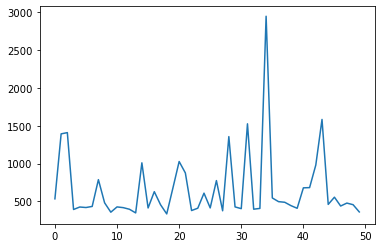

In [26]:
#Plotting the trend of MSE through iterations
names = range(50)
values = list_mse
plt.plot(names, values)
plt.show()

In [27]:
(max(list_mse),min(list_mse))

(2944.3744669127746, 335.3767476688099)